In [1]:
import torch
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Device : {device}")

Device : mps


In [2]:
train_data = datasets.FashionMNIST(
    root = "data/fashion_mnist",
    train = True,
    download= True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root =" data/fashion_mnist",
    train =False,
    download=True,
    transform=ToTensor()
)

In [4]:

print("\nLength of train data:\n",len(train_data)) ## Should get 60K samples
print("\nLength of test data: \n",len(test_data)) ## Should get 10K sample


print("\nClasses in training data\n", train_data.classes)



Length of train data:
 60000

Length of test data: 
 10000

Classes in training data
 ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


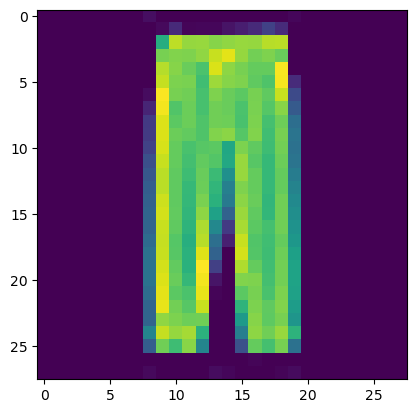

In [ ]:
plt.imshow(train_data[21][0].squeeze())

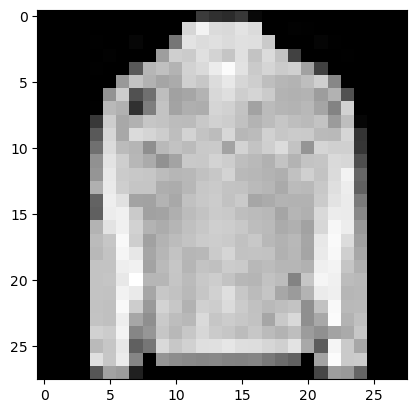

In [ ]:
plt.imshow(train_data[29][0].squeeze(), cmap = 'gray')

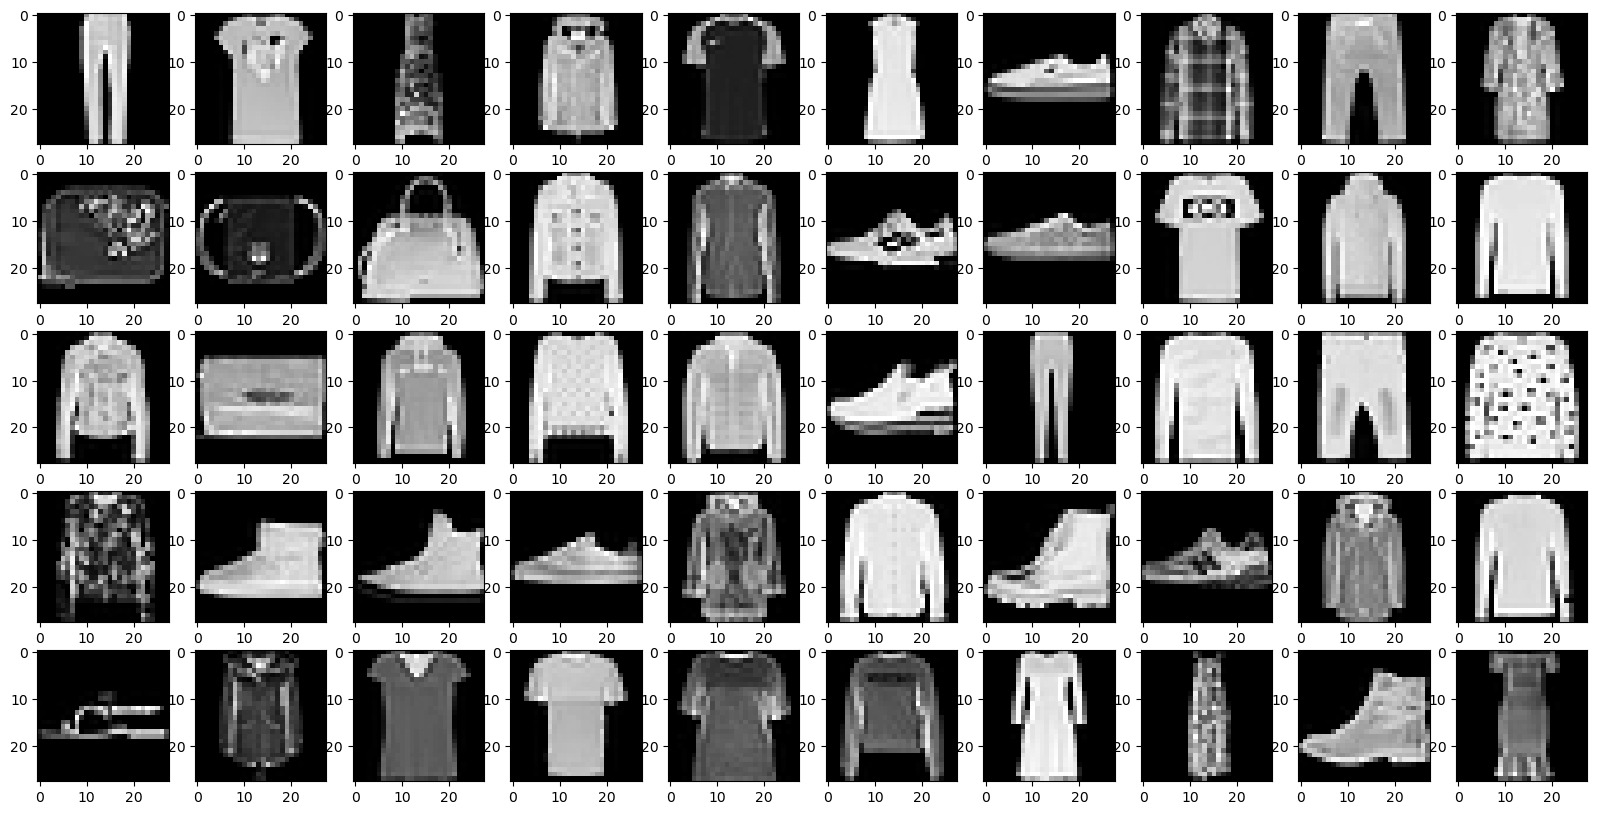

In [ ]:
torch.manual_seed(40)

fig = plt.figure(figsize=(20,10))
rows, cols =  5,10

for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size = [1]).item()
    image, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(image.squeeze(), cmap='gray')

In [6]:
## Now we are creating the Dataloader so that we can run our models on small batches rather than whole dataset

## batchsize
batch_size = 32

## Create train dataloader
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

## Create test dataloader
test_dataloader = DataLoader(test_data, batch_size=batch_size)


## Print the length of dataloaders
print("lenght of train dataloader is ", len(train_dataloader))
print("lenght of test dataloader is ", len(test_dataloader))

lenght of train dataloader is  1875
lenght of test dataloader is  313


In [7]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

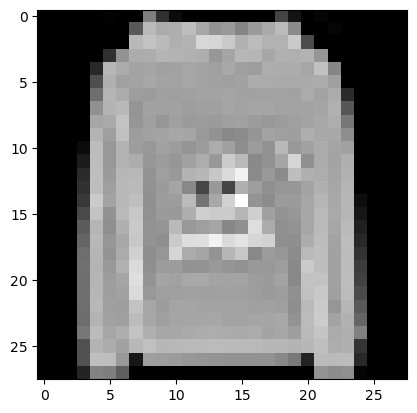

In [9]:
plt.imshow(train_features_batch[0][0].squeeze(), cmap='gray')

In [19]:
from torch import nn

class FashionMnistModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_unit:int, output_shape:int):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, hidden_unit),
            nn.Linear(hidden_unit, output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)


In [20]:
torch.manual_seed(40)

model0 = FashionMnistModelV0(input_shape =784, hidden_unit=10, output_shape=len(train_data.classes))

model0.to("cpu")

FashionMnistModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
## Setup a loss function and optimiser

loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(params=model0.parameters(), lr=0.1)